In [1]:
# Cargar Librerias
import os
import sys
import random
import shutil
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import defaultdict
import xml.etree.ElementTree as ET
import data

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
_URL = 'https://s3-sa-east-1.amazonaws.com/darkanita/DatasetPeople.zip'
_Filename ='DatasetPeople.zip'
zip_dir = data.load_data(_URL,_Filename)
data_dir = zip_dir[:-10]
print(zip_dir)

/Users/anita/.keras/datasets/DatasetPeople.zip


In [3]:
#data.prepare_dataset(data_dir)   

In [16]:
metadata = pd.read_csv('metadata.csv')
summary_metadata = metadata.groupby('label').agg({'filename':'count'})
print(summary_metadata)

       filename
label          
0            58
1            16
2            53
3            20
4            50


In [5]:
train_sources = data.build_sources_from_metadata(metadata, 'image_files')
valid_sources = data.build_sources_from_metadata(metadata, 'image_files', mode='valid')
total_train = len(train_sources)
total_val = len(valid_sources)

In [6]:
dataset = data.make_dataset(train_sources, training=True,batch_size=3, num_epochs=1,num_parallel_calls=3,img_shape=128)
dataset = iter(dataset)

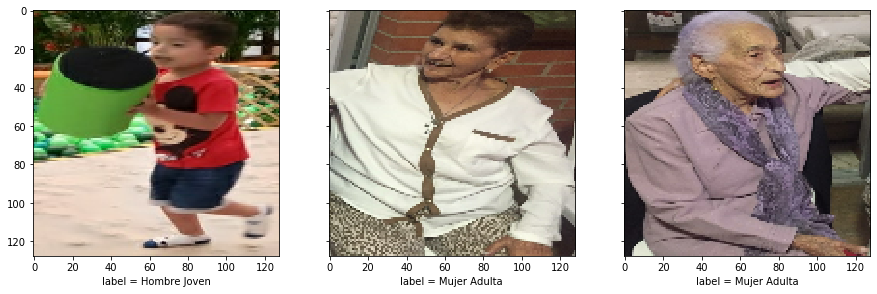

In [13]:
data.imshow_batch_of_three(next(dataset))

In [71]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))
model.add(tf.keras.layers.Dense(5, activation='softmax'))
model.compile(loss=tf.losses.SparseCategoricalCrossentropy(),optimizer=tf.optimizers.Adam(0.0001),metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 15365     
Total params: 15,365
Trainable params: 15,365
Non-trainable params: 0
_________________________________________________________________


In [80]:
BATCH_SIZE = 5
VALIDATION_STEPS = 2
NUM_EPOCHS = 400

In [81]:
train_dataset = data.make_dataset(train_sources, training=True,batch_size=BATCH_SIZE, num_epochs=1,num_parallel_calls=2)
valid_dataset = data.make_dataset(valid_sources, training=False,batch_size=BATCH_SIZE, num_epochs=1,num_parallel_calls=2)

print(model.evaluate(train_dataset))
print(model.evaluate(valid_dataset))

30/30 [==============================] - 1s 17ms/step - loss: 0.0151 - accuracy: 1.0000
[0.015117445417369405, 1.0]
10/10 [==============================] - 0s 21ms/step - loss: 2.4223 - accuracy: 0.3673
[2.422309100627899, 0.36734694]


In [82]:
history = model.fit(x=train_dataset, epochs=NUM_EPOCHS,
        validation_data=valid_dataset, validation_steps=VALIDATION_STEPS)

print(model.evaluate(train_dataset))
print(model.evaluate(valid_dataset))

Epoch 1/400
30/30 [==============================] - 1s 21ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 3.1512 - val_accuracy: 0.3000
Epoch 2/400
30/30 [==============================] - 1s 23ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 3.1511 - val_accuracy: 0.3000
Epoch 3/400
30/30 [==============================] - 1s 25ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 3.1581 - val_accuracy: 0.3000
Epoch 4/400
30/30 [==============================] - 1s 22ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 3.1622 - val_accuracy: 0.3000
Epoch 5/400
30/30 [==============================] - 1s 21ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 3.1670 - val_accuracy: 0.3000
Epoch 6/400
30/30 [==============================] - 1s 20ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 3.1716 - val_accuracy: 0.3000
Epoch 7/400
30/30 [==============================] - 1s 21ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 3.1762 - val_accuracy: 0.3000
Epoch 

30/30 [==============================] - 1s 21ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 3.4026 - val_accuracy: 0.3000
Epoch 59/400
30/30 [==============================] - 1s 21ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 3.4070 - val_accuracy: 0.3000
Epoch 60/400
30/30 [==============================] - 1s 21ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 3.4115 - val_accuracy: 0.3000
Epoch 61/400
30/30 [==============================] - 1s 20ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 3.4160 - val_accuracy: 0.3000
Epoch 62/400
30/30 [==============================] - 1s 20ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 3.4205 - val_accuracy: 0.3000
Epoch 63/400
30/30 [==============================] - 1s 21ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 3.4249 - val_accuracy: 0.3000
Epoch 64/400
30/30 [==============================] - 1s 22ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 3.4294 - val_accuracy: 0.3000
Epoch 65/400

30/30 [==============================] - 1s 22ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 3.6600 - val_accuracy: 0.2000
Epoch 116/400
30/30 [==============================] - 1s 21ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 3.6646 - val_accuracy: 0.2000
Epoch 117/400
30/30 [==============================] - 1s 22ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 3.6691 - val_accuracy: 0.2000
Epoch 118/400
30/30 [==============================] - 1s 22ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 3.6737 - val_accuracy: 0.2000
Epoch 119/400
30/30 [==============================] - 1s 21ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 3.6783 - val_accuracy: 0.2000
Epoch 120/400
30/30 [==============================] - 1s 22ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 3.6829 - val_accuracy: 0.2000
Epoch 121/400
30/30 [==============================] - 1s 22ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 3.6874 - val_accuracy: 0.2000
Epoch 

Epoch 172/400
30/30 [==============================] - 1s 21ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 3.9228 - val_accuracy: 0.2000
Epoch 173/400
30/30 [==============================] - 1s 21ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 3.9274 - val_accuracy: 0.2000
Epoch 174/400
30/30 [==============================] - 1s 21ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 3.9321 - val_accuracy: 0.2000
Epoch 175/400
30/30 [==============================] - 1s 21ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 3.9368 - val_accuracy: 0.2000
Epoch 176/400
30/30 [==============================] - 1s 21ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 3.9414 - val_accuracy: 0.2000
Epoch 177/400
30/30 [==============================] - 1s 22ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 3.9461 - val_accuracy: 0.2000
Epoch 178/400
30/30 [==============================] - 1s 22ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 3.9507 - val_accuracy:

Epoch 229/400
30/30 [==============================] - 1s 21ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 4.1901 - val_accuracy: 0.2000
Epoch 230/400
30/30 [==============================] - 1s 21ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 4.1948 - val_accuracy: 0.2000
Epoch 231/400
30/30 [==============================] - 1s 21ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 4.1995 - val_accuracy: 0.2000
Epoch 232/400
30/30 [==============================] - 1s 21ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 4.2042 - val_accuracy: 0.2000
Epoch 233/400
30/30 [==============================] - 1s 21ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 4.2090 - val_accuracy: 0.2000
Epoch 234/400
30/30 [==============================] - 1s 20ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 4.2137 - val_accuracy: 0.2000
Epoch 235/400
30/30 [==============================] - 1s 21ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 4.2184 - val_accuracy:

30/30 [==============================] - 1s 21ms/step - loss: 8.7829e-04 - accuracy: 1.0000 - val_loss: 4.4562 - val_accuracy: 0.2000
Epoch 286/400
30/30 [==============================] - 1s 21ms/step - loss: 8.6962e-04 - accuracy: 1.0000 - val_loss: 4.4609 - val_accuracy: 0.2000
Epoch 287/400
30/30 [==============================] - 1s 20ms/step - loss: 8.6103e-04 - accuracy: 1.0000 - val_loss: 4.4657 - val_accuracy: 0.2000
Epoch 288/400
30/30 [==============================] - 1s 21ms/step - loss: 8.5252e-04 - accuracy: 1.0000 - val_loss: 4.4705 - val_accuracy: 0.2000
Epoch 289/400
30/30 [==============================] - 1s 20ms/step - loss: 8.4409e-04 - accuracy: 1.0000 - val_loss: 4.4753 - val_accuracy: 0.2000
Epoch 290/400
30/30 [==============================] - 1s 20ms/step - loss: 8.3575e-04 - accuracy: 1.0000 - val_loss: 4.4801 - val_accuracy: 0.2000
Epoch 291/400
30/30 [==============================] - 1s 21ms/step - loss: 8.2750e-04 - accuracy: 1.0000 - val_loss: 4.4849 -

30/30 [==============================] - 1s 20ms/step - loss: 5.0894e-04 - accuracy: 1.0000 - val_loss: 4.7204 - val_accuracy: 0.2000
Epoch 341/400
30/30 [==============================] - 1s 20ms/step - loss: 5.0392e-04 - accuracy: 1.0000 - val_loss: 4.7252 - val_accuracy: 0.2000
Epoch 342/400
30/30 [==============================] - 1s 21ms/step - loss: 4.9896e-04 - accuracy: 1.0000 - val_loss: 4.7300 - val_accuracy: 0.2000
Epoch 343/400
30/30 [==============================] - 1s 21ms/step - loss: 4.9404e-04 - accuracy: 1.0000 - val_loss: 4.7348 - val_accuracy: 0.2000
Epoch 344/400
30/30 [==============================] - 1s 20ms/step - loss: 4.8916e-04 - accuracy: 1.0000 - val_loss: 4.7397 - val_accuracy: 0.2000
Epoch 345/400
30/30 [==============================] - 1s 20ms/step - loss: 4.8434e-04 - accuracy: 1.0000 - val_loss: 4.7445 - val_accuracy: 0.2000
Epoch 346/400
30/30 [==============================] - 1s 21ms/step - loss: 4.7956e-04 - accuracy: 1.0000 - val_loss: 4.7493 -

30/30 [==============================] - 1s 23ms/step - loss: 2.9532e-04 - accuracy: 1.0000 - val_loss: 4.9869 - val_accuracy: 0.2000
Epoch 396/400
30/30 [==============================] - 1s 22ms/step - loss: 2.9241e-04 - accuracy: 1.0000 - val_loss: 4.9917 - val_accuracy: 0.2000
Epoch 397/400
30/30 [==============================] - 1s 24ms/step - loss: 2.8954e-04 - accuracy: 1.0000 - val_loss: 4.9966 - val_accuracy: 0.2000
Epoch 398/400
30/30 [==============================] - 1s 25ms/step - loss: 2.8669e-04 - accuracy: 1.0000 - val_loss: 5.0014 - val_accuracy: 0.2000
Epoch 399/400
30/30 [==============================] - 1s 22ms/step - loss: 2.8388e-04 - accuracy: 1.0000 - val_loss: 5.0063 - val_accuracy: 0.2000
Epoch 400/400
30/30 [==============================] - 1s 17ms/step - loss: 2.7449e-04 - accuracy: 1.0000
[0.0002744899242922353, 1.0]
10/10 [==============================] - 0s 23ms/step - loss: 3.7421 - accuracy: 0.3673
[3.7421356439590454, 0.36734694]


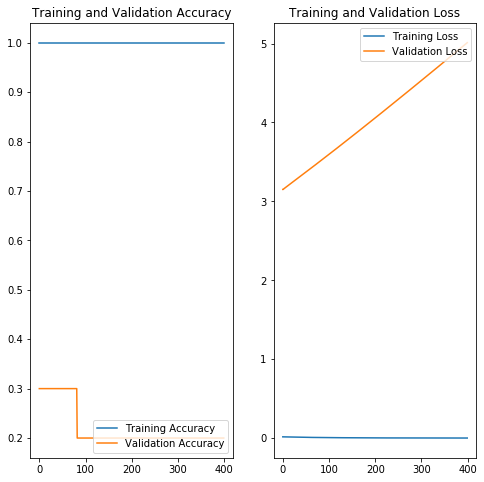

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(NUM_EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()